# Import Needed Libraries

In [ ]:
!pip install selenium
!pip install sklearn
!pip install matplotlib
!pip install seaborn
!pip install pandas-profiling

In [ ]:
%pylab inline
%matplotlib inline

# web scrabing lib imports
from bs4 import BeautifulSoup
import requests
import time, os
from IPython.core.display import display, HTML
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import re

# Data Analysis lib imports
import pandas as pd
import numpy as np

# import ML libs
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge ,RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score ,KFold ,GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler,PolynomialFeatures
from sklearn.pipeline import make_pipeline , Pipeline

# import visual libs
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno


# import reporting lib
import pandas_profiling as pp

Populating the interactive namespace from numpy and matplotlib


# Helper Functions 

In [ ]:
def linear_reg(X_train,y_train,X_val,y_val):
    m = LinearRegression()
    m.fit(X_train,y_train)
    
    print("training score :", round(m.score(X_train,y_train) ,5))
    print("val score :", round(m.score(X_val,y_val),5))
    return m

# Web Scribing 

### Driver insetence 

In [ ]:
chromedriver = "/Users/ranyaranya/Downloads/chromedriver" # path to the chromedriver executable
os.environ["webdriver.chrome.driver"] = chromedriver

In [ ]:
url = 'https://www.udemy.com/courses/development/?p=11' 

In [ ]:
# to check the status of the page
response = requests.get(url)
response.status_code  #200 = success!

200

In [ ]:
driver = webdriver.Chrome(chromedriver)
driver.get(url)

### Soup insetence

In [ ]:
# put the page html into soup so python can manpulate the html 
soup = BeautifulSoup(driver.page_source, "lxml")

In [ ]:
# to take a look at the html in readable way
print(soup.prettify())

### investigate the html through soup

In [ ]:
# to test the output of the class in html tag
for element in soup.find_all("div",class_ = "course-card--container--1QM2W course-card--large--2aYkn"):
    #print(element.prettify())
    runtime_regex1 = re.compile('lectures')
    if str(type(element.find(text=runtime_regex1))) != "<class 'NoneType'>":
        num_lectures = str(element.find("span",text=runtime_regex1).text)
        num_lectures = num_lectures.split(" ")
        num_lectures = float(num_lectures[0])
   

        print(num_lectures)
    

### start to scribe all wented pages 

In [ ]:
listOfDepartments =["development","business","finance-and-accounting","it-and-software","office-productivity","design","marketing","lifestyle","photography-and-video","health-and-fitness","music","teaching-and-academics"]
listOflistes = []

for dep in listOfDepartments:
    
    r = 1
    
    if dep == "lifestyle":
        r = 73
        
    for num in range(r,100):
        print(f"page # --> {num}, dep name --> {dep}")

        url = f'https://www.udemy.com/courses/{dep}/?p={str(num)}'
        driver = webdriver.Chrome(chromedriver)
        driver.get(url)
        time.sleep(6)
        soup = BeautifulSoup(driver.page_source, "lxml")

    #     CoursesList=[]


        for element in soup.find_all(class_ = "course-card--container--1QM2W course-card--large--2aYkn"):
    #         CoursesList.append(element)

           


            courseinfo = []
            try:
                
                # Title DONE!
                Title = element.find("div",class_="udlite-focus-visible-target udlite-heading-md course-card--course-title--vVEjC")
                
                if str(type(Title)) != "<class 'NoneType'>":
                    print(f"Title -- {Title.text}")
                    Title = Title.text
                    courseinfo.append(Title)
                else:
                    print(f"Title -- None")
                    courseinfo.append(None)
            except AttributeError:
                courseinfo.append(None)

                
            try:
                # Description DONE!
                Description = element.find("p",class_="udlite-text-sm course-card--course-headline--2DAqq")
                
                if str(type(Description)) != "<class 'NoneType'>":
                    print(f"Description -- {Description.text}")
                    Description = element.find("p",class_="udlite-text-sm course-card--course-headline--2DAqq").text
                    courseinfo.append(Description)
                else:
                    print(f"Description -- None")
                    courseinfo.append(None)
            except AttributeError:
                courseinfo.append(None)

                
            try:
                # Instructor  DONE!
                Instructor = element.find("div",class_="udlite-text-xs course-card--instructor-list--nH1OC")
                
                if str(type(Instructor)) != "<class 'NoneType'>":
                    print(f"Instructor -- {Instructor.text}")
                    Instructor = Instructor.text
                    courseinfo.append(Instructor)
                else:
                    print(f"Instructor -- None")
                    courseinfo.append(None)
            except AttributeError:
                courseinfo.append(None)
                
            
            try:
                Rating = element.find("span",class_="udlite-sr-only")
                
                # Rating DONE!
                if str(type(Rating)) != "<class 'NoneType'>":
                    print(f"Rating -- {Rating.text}")
                    Rating = float(str(Rating.text).split(" ")[1])
                    courseinfo.append(Rating)
                else:
                    print(f"Rating -- None")
                    courseinfo.append(None)
            except AttributeError:
                courseinfo.append(None)
                

            try:
                Views = element.find("span",class_="udlite-text-xs course-card--reviews-text--1yloi")
                
                # Views DONE!
                if str(type(Views)) != "<class 'NoneType'>":
                    print(f"Views -- {Views.text}")
                    Views = Views.text.replace("(","")
                    Views = Views.replace(")","")
                    Views = Views.replace(",","")
                    Views = int(Views)
                    courseinfo.append(Views)
                else:
                    print(f"Views -- None")
                    courseinfo.append(None)
            except AttributeError:
                courseinfo.append(None)

            try:
                Oregnal_price = element.find("div" ,class_ = "price-text--price-part--2npPm course-card--discount-price--1bQ5Q udlite-heading-md")
                
                # Oregnal_price  DONE!
                if str(type(Oregnal_price)) != "<class 'NoneType'>":
                    print(f"Oregnal_price -- {Oregnal_price.text}")
                    Oregnal_price = Oregnal_price.text
                    Oregnal_price = float(str(Oregnal_price).split("$")[-1])
                    courseinfo.append(Oregnal_price)
                else:
                    print(f"Oregnal_price -- None")
                    courseinfo.append(None)
            except AttributeError:
                courseinfo.append(None)

           
            try:
                Discount_price = element.find("div" ,class_ = "price-text--price-part--2npPm price-text--original-price--1sDdx course-card--list-price--3RTcj udlite-text-sm")
                
                # Discount_price  DONE!
                if str(type(Discount_price)) != "<class 'NoneType'>":
                    Discount_price = Discount_price.text
                    print(f"Discount_price -- {Discount_price}")
                    Discount_price = float(str(Discount_price).split("$")[-1])
                    courseinfo.append(Discount_price)
                else:
                    print(f"Discount_price -- None")
                    courseinfo.append(None)
            except AttributeError:
                courseinfo.append(None)

            
            try:
                # Hours DONE!
                runtime_regex = re.compile('total hours')
                Hours = element.find("span",text=runtime_regex)
                
                if str(type(Hours)) != "<class 'NoneType'>":
                    Hours = str(Hours.text)
                    print(f"Hours -- {Hours}")
                    Hours = Hours.split(" ")
                    Hours = float(Hours[0])
                    courseinfo.append(Hours)
                else:
                    print(f"Hours -- None")
                    courseinfo.append(None)
            except AttributeError:
                courseinfo.append(None)


            
            
            try:
                # num_lectures DONE!
                runtime_regex1 = re.compile('lectures')
                num_lectures = element.find("span",text=runtime_regex1)
                
                if str(type(num_lectures)) != "<class 'NoneType'>":
                    num_lectures = str(num_lectures.text)
                    print(f"num_lectures -- {num_lectures}")
                    num_lectures = num_lectures.split(" ")
                    num_lectures = float(num_lectures[0])
                    courseinfo.append(num_lectures)
                else:
                    print(f"num_lectures -- None")
                    courseinfo.append(None)
            except AttributeError:
                courseinfo.append(None)
                

            try:
                Level = element.find("span",text=runtime_regex1).findNext()
                
                # Level DONE!
                if str(type(Level)) != "<class 'NoneType'>":
                    Level = Level.text
                    print(f"Level -- {Level}")
                    courseinfo.append(Level)
                else:
                    print(f"Level -- None")
                    courseinfo.append(None)
            except AttributeError:
                courseinfo.append(None)

            
            try:
                # is Best saller DONE!
                if str(type(element.find(class_ = "udlite-badge udlite-heading-xs udlite-badge-bestseller"))) != "<class 'NoneType'>":
                    courseinfo.append(1)
                else: 
                    courseinfo.append(0)
            except AttributeError:
                courseinfo.append(None)

            #Catogory

            courseinfo.append(dep)



            listOflistes.append(courseinfo)
            print()

        time.sleep(3)


page # --> 73, dep name --> lifestyle
Title -- Minecraft Beginners Guide - How To Play Minecraft
Description -- Learn to survive in Mincraft! Have fun learning about crafting, mining, building, farming and much more in Minecraft!
Instructor -- Lucas Whitaker
Rating -- Rating: 4.7 out of 5
Views -- (56)
Oregnal_price -- Current price$12.99
Discount_price -- Original Price$19.99
Hours -- 2 total hours
num_lectures -- 26 lectures
Level -- Beginner

Title -- Gardening Know How: Attracting Birds and Butterflies
Description -- Create a beautiful bird and butterfly filled garden, yard, or even balcony via simple, practical, and fun DIY projects!
Instructor -- Linda Kelso
Rating -- Rating: 4.4 out of 5
Views -- (56)
Oregnal_price -- Current price$12.99
Discount_price -- Original Price$74.99
Hours -- None
num_lectures -- 18 lectures
Level -- Beginner

Title -- The Complete Guide to Quilting for the Beginner
Description -- Learn to create gorgeous quilts; fun to make and keep, sell, or give as g

page # --> 75, dep name --> lifestyle
Title -- Watercolor Painting. 5 ESSENTIAL tips to paint with impact.
Description -- I consider these the most valuable  lessons you will learn when painting with watercolours.  See your work transformed.
Instructor -- Nicola A Blakemore
Rating -- Rating: 4.2 out of 5
Views -- (54)
Oregnal_price -- Current price$12.99
Discount_price -- Original Price$19.99
Hours -- None
num_lectures -- 11 lectures
Level -- All Levels

Title -- Quick and Easy Non Dairy Cheese Course
Description -- Learn how to make Natural Dairy Free Cheese Dishes in as little as 15 minutes (With Bonus Recipes)
Instructor -- Manuel Caride
Rating -- Rating: 4.3 out of 5
Views -- (54)
Oregnal_price -- Current price$12.99
Discount_price -- Original Price$89.99
Hours -- 1.5 total hours
num_lectures -- 31 lectures
Level -- All Levels

Title -- The Grandmaster’s Techniques – 2nd edition
Description -- Your guide to think and calculate during each stage of game
Instructor -- Igor Smirnov
Ra

page # --> 77, dep name --> lifestyle
Title -- Byzantine Iconography Series 3: Garment Basics (Drawing)
Description -- Laying the Foundations for Byzantine Iconography
Instructor -- Bridget Hayes
Rating -- Rating: 4.8 out of 5
Views -- (52)
Oregnal_price -- Current price$29.99
Discount_price -- None
Hours -- None
num_lectures -- 12 lectures
Level -- Beginner

Title -- Decluttering: Quickly Organize & Declutter Your Home
Description -- Decluttering & organizing your bedroom & kitchen. Declutter & organize with daily steps to decluttering your home today
Instructor -- Tatiana Ambrose
Rating -- Rating: 4.0 out of 5
Views -- (52)
Oregnal_price -- Current price$12.99
Discount_price -- Original Price$89.99
Hours -- 2.5 total hours
num_lectures -- 38 lectures
Level -- Beginner

Title -- Learn Vedic Astrology Part 5
Description -- Love Matters & Lifetime Themes Guidelines
Instructor -- Janet M
Rating -- Rating: 4.5 out of 5
Views -- (52)
Oregnal_price -- Current price$13.99
Discount_price -- O

page # --> 79, dep name --> lifestyle
Title -- Diploma  Course In professional Palmistry/ Fortune Telling
Description -- A Basic To Expert Level Detailed Course in the Ancient Art of Chiromancy
Instructor -- Dr. Himani Sharma
Rating -- Rating: 4.8 out of 5
Views -- (50)
Oregnal_price -- Current price$12.99
Discount_price -- Original Price$89.99
Hours -- 4.5 total hours
num_lectures -- 103 lectures
Level -- All Levels

Title -- Watercolor Painting - Understanding Tone
Description -- I believe this course will assist you in judging tone and improve your painting skills.
Instructor -- Arie Swanepoel
Rating -- Rating: 4.7 out of 5
Views -- (49)
Oregnal_price -- Current price$12.99
Discount_price -- Original Price$89.99
Hours -- None
num_lectures -- 11 lectures
Level -- All Levels

Title -- Watercolor painting: Realistic Dog portrait, step by step 
Description -- Follow me painting step by step and create this awesome watercolor dog with me without any effort
Instructor -- Yana Shvets
Ratin

page # --> 81, dep name --> lifestyle
Title -- Learn to PLAN & PAINT a watercolor landscape in 9 easy steps
Description -- Learn to paint any subject by painting this watercolor landscape, and see how easy it is to plan, design then paint.
Instructor -- Nicola A Blakemore
Rating -- Rating: 4.3 out of 5
Views -- (48)
Oregnal_price -- Current price$12.99
Discount_price -- Original Price$49.99
Hours -- None
num_lectures -- 14 lectures
Level -- Intermediate

Title -- Shading Masters: The 4 Steps to Shading Drawing Course
Description -- The Simple 4 Step Strategy For Creating  Consistent Shading In All Of Your Drawings
Instructor -- Kevin Kramer
Rating -- Rating: 3.6 out of 5
Views -- (48)
Oregnal_price -- Current price$12.99
Discount_price -- Original Price$19.99
Hours -- None
num_lectures -- 8 lectures
Level -- All Levels

Title -- Magical Baths: Spiritual Baths For Real Change!
Description -- Learn To Use Spiritual Baths To Clear Negativity & Attract Blessings!
Instructor -- Helpful Secr

page # --> 83, dep name --> lifestyle
Title -- Lucid Dreaming - Astral Travel & Astral Projection Guide
Description -- How To Astral Travel : Astral Projection : Lucid Dreaming : Beginners Guide Astral Projection : Lucid Dreaming Beginners
Instructor -- Kensho Dharma
Rating -- Rating: 4.8 out of 5
Views -- (46)
Oregnal_price -- Current price$13.99
Discount_price -- Original Price$19.99
Hours -- 1.5 total hours
num_lectures -- 15 lectures
Level -- Beginner

Title -- Cruelty-Free Cosmetics Class
Description -- A Guide to living a cruelty-free and beautiful life! Makeup Artistry class and what products to look for!
Instructor -- Samantha & Andrea McLeod
Rating -- Rating: 4.2 out of 5
Views -- (46)
Oregnal_price -- Current price$49.99
Discount_price -- None
Hours -- 1.5 total hours
num_lectures -- 21 lectures
Level -- All Levels

Title -- Be a Horse Riding Coach - How to Teach Others Horsemanship
Description -- How to be a horse riding instructor and teach beginner riding lessons | Horsema

page # --> 85, dep name --> lifestyle
Title -- Manifest your Divine Purpose as a Healer
Description -- Get aligned to your Soul mission and manifest your Spiritual Purpose as a Healer
Instructor -- Melissa Habibi
Rating -- Rating: 4.7 out of 5
Views -- (45)
Oregnal_price -- Current price$12.99
Discount_price -- Original Price$49.99
Hours -- 2.5 total hours
num_lectures -- 32 lectures
Level -- All Levels

Title -- Japanese Pastry Course #3  Matcha desserts
Description -- Learn the differences of several green teas, and how to use matcha properly for drinks and baking delicious cakes.
Instructor -- IndyAssa Japan
Rating -- Rating: 5.0 out of 5
Views -- (44)
Oregnal_price -- Current price$12.99
Discount_price -- Original Price$24.99
Hours -- None
num_lectures -- 9 lectures
Level -- All Levels

Title -- DIY Self Waxing at Home
Description -- You can do this! Learn how to wax your legs, bikini, and under arm. You'll wonder why you didn't learn sooner
Instructor -- Ashley May
Rating -- Ratin

page # --> 87, dep name --> lifestyle
Title -- Japanese Pastry Course #5 Japanese Hokkaido Milk Bread
Description -- Learn how to bake perfect fluffy Japanese milk bread.
Instructor -- IndyAssa Japan
Rating -- Rating: 4.8 out of 5
Views -- (42)
Oregnal_price -- Current price$12.99
Discount_price -- Original Price$24.99
Hours -- None
num_lectures -- 13 lectures
Level -- All Levels

Title -- English Calligraphy
Description -- The Beginners Guide
Instructor -- Priyanka Krishnan
Rating -- Rating: 4.7 out of 5
Views -- (43)
Oregnal_price -- Current price$12.99
Discount_price -- Original Price$24.99
Hours -- 3 total hours
num_lectures -- 85 lectures
Level -- Beginner

Title -- 21 Day Manifestation Mindset Challenge
Description -- Are you up for the Challenge? Get into the Manifestation Mindset with this 21 Day Challenge
Instructor -- Graham Nicholls
Rating -- Rating: 4.6 out of 5
Views -- (43)
Oregnal_price -- Current price$12.99
Discount_price -- Original Price$49.99
Hours -- 3 total hours


page # --> 89, dep name --> lifestyle
Title -- Bread Baking for Beginners
Description -- Clean Breads, No Chemicals, No Egg, Bread Baking for Beginners
Instructor -- Pankti Desai Sawhney
Rating -- Rating: 3.3 out of 5
Views -- (40)
Oregnal_price -- Current price$12.99
Discount_price -- Original Price$24.99
Hours -- 2 total hours
num_lectures -- 21 lectures
Level -- Beginner

Title -- Symmetry & Shape Drawing with Procreate for iPad!
Description -- Create amazing mirrored art or mandalas! Draw perfectly straight lines, smooth curves, & clean shapes in your artwork.
Instructor -- Kurt Michael Russell
Rating -- Rating: 4.7 out of 5
Views -- (40)
Oregnal_price -- Current price$12.99
Discount_price -- Original Price$39.99
Hours -- 1.5 total hours
num_lectures -- 17 lectures
Level -- Beginner

Title -- REIKI: Reiki & Color Therapy Certification!
Description -- Practice Reiki & Color Therapy, Heal with Reiki, Perform Reiki session & Color Therapy Session, Get Certification!
Instructor -- Expe

page # --> 91, dep name --> lifestyle
Title -- Chess Openings: Learn to Play the King's Indian Defense
Description -- Crush Your Chess Opponents with the KID!
Instructor -- Greg Vanderford
Rating -- Rating: 3.7 out of 5
Views -- (39)
Oregnal_price -- Current price$12.99
Discount_price -- Original Price$89.99
Hours -- 2.5 total hours
num_lectures -- 15 lectures
Level -- Beginner

Title -- Draw and tile Islamic geometric patterns in a zellige design
Description -- Learn to construct and outline five geometric patterns from around the Islamic world
Instructor -- Sandy Kurt
Rating -- Rating: 4.3 out of 5
Views -- (39)
Oregnal_price -- Current price$49.99
Discount_price -- None
Hours -- 3 total hours
num_lectures -- 7 lectures
Level -- Intermediate

Title -- Chakra Master Certification
Description -- Learn about the Power of Chakras and How to Energize them in your Everyday Life!
Instructor -- Joey Wargachuk
Rating -- Rating: 4.7 out of 5
Views -- (39)
Oregnal_price -- Current price$12.99
D

page # --> 93, dep name --> lifestyle
Title -- The Complete Guide To Men's Skincare
Description -- Learn How To Look Younger & Healthier For Longer With Men's Skincare, Better Get Used To More Complements & Confidence
Instructor -- Creative Solutions
Rating -- Rating: 3.9 out of 5
Views -- (37)
Oregnal_price -- Current price$12.99
Discount_price -- Original Price$79.99
Hours -- 1.5 total hours
num_lectures -- 27 lectures
Level -- All Levels

Title -- How to Make a Successful Move Abroad: Easy Transition Guide
Description -- Take the pain and stress out of your upcoming move abroad by using effective best practices for an easier transition.
Instructor -- Kristen Palana
Rating -- Rating: 4.7 out of 5
Views -- (37)
Oregnal_price -- Current price$12.99
Discount_price -- Original Price$54.99
Hours -- 2 total hours
num_lectures -- 41 lectures
Level -- All Levels

Title -- Zen Beekeeping for the Beginner
Description -- Honey Bees and Being the Beekeeper: Learn Beekeeping as a Path to Zen
Inst

page # --> 95, dep name --> lifestyle
Title -- Certificate Course in Facial Skin Care
Description -- Basics of Clinical Cosmetology
Instructor -- Dr Sonia Tekchandani
Rating -- Rating: 3.9 out of 5
Views -- (36)
Oregnal_price -- Current price$12.99
Discount_price -- Original Price$89.99
Hours -- 1.5 total hours
num_lectures -- 4 lectures
Level -- Beginner

Title -- Advanced Still Life Painting: Paint Your Own Expressive Art
Description -- Learn the art of painting loose through design and composition.
Instructor -- Robert Joyner
Rating -- Rating: 4.2 out of 5
Views -- (36)
Oregnal_price -- Current price$13.99
Discount_price -- Original Price$69.99
Hours -- 2 total hours
num_lectures -- 17 lectures
Level -- Intermediate

Title -- Escape The Matrix With Astral Projection
Description -- Learn To Astral Project in Just 30 Seconds!
Instructor -- Cal Melkez
Rating -- Rating: 4.9 out of 5
Views -- (36)
Oregnal_price -- Current price$12.99
Discount_price -- Original Price$49.99
Hours -- 1.5 to

page # --> 97, dep name --> lifestyle
Title -- How to Draw Animal Portraits for Beginners
Description -- Learn How to Sketch Beautiful Animal and Pet Portraits with Step-by-Step Instructions
Instructor -- Ethan Nguyen
Rating -- Rating: 4.8 out of 5
Views -- (35)
Oregnal_price -- Current price$12.99
Discount_price -- Original Price$29.99
Hours -- 4.5 total hours
num_lectures -- 30 lectures
Level -- Beginner

Title -- Food Forest Design & Care for Cities and Suburbs
Description -- Design and build a permaculture food forest in your backyard, neighborhood, or city
Instructor -- Toby Hemenway
Rating -- Rating: 3.5 out of 5
Views -- (35)
Oregnal_price -- Current price$49.99
Discount_price -- None
Hours -- 4 total hours
num_lectures -- 17 lectures
Level -- All Levels

Title -- Previous life horoscope- The step-by-step course
Description -- Past Life Astrology: How Use Your Natal Chart to Understand Your Karma
Instructor -- Maria Ciobanu
Rating -- Rating: 3.2 out of 5
Views -- (35)
Oregnal_pr

page # --> 99, dep name --> lifestyle
Title -- Advance Your Sewing Skills
Description -- This extensive sewing course will help improve many aspects of your sewing skills and help improve your projects
Instructor -- Ashley Hough
Rating -- Rating: 4.4 out of 5
Views -- (34)
Oregnal_price -- Current price$49.99
Discount_price -- None
Hours -- 1.5 total hours
num_lectures -- 6 lectures
Level -- All Levels

Title -- Backcountry Camping For Beginners
Description -- Backcountry Camping for Beginners - INTRODUCTORY PRICE !
Instructor -- Christina Scheuermann
Rating -- Rating: 4.8 out of 5
Views -- (34)
Oregnal_price -- Current price$12.99
Discount_price -- Original Price$54.99
Hours -- 5 total hours
num_lectures -- 118 lectures
Level -- Beginner

Title -- The Secrets of Healing: Sophrology, Magnetism, and Hypnosis
Description -- Become Sophrologist, Magnetizer and Hypnotist. Being able to heal easily with Alternative Medicine (Hypnotherapy, ...)
Instructor -- David Michigan
Rating -- Rating: 

### Generate the DataFrame

In [ ]:
CoursesDataFrame = pd.DataFrame(listOflistes)
CoursesDataFrame.columns = ["Title","Description","Instructor","Rating","Views","Oregnal_price","Discount_price","Hours","Num_lectures","Level","isBestSaller","Catogory"]

In [ ]:
CoursesDataFrame.head()

,Title,Description,Instructor,Rating,Views,Oregnal_price,Discount_price,Hours,Num_lectures,Level,isBestSaller,Catogory
0,Minecraft Beginners Guide - How To Play Minecraft,Learn to survive in Mincraft! Have fun learnin...,Lucas Whitaker,4.7,56,12.99,19.99,2.0,26.0,Beginner,0,lifestyle
1,Gardening Know How: Attracting Birds and Butte...,Create a beautiful bird and butterfly filled g...,Linda Kelso,4.4,56,12.99,74.99,NaN,18.0,Beginner,0,lifestyle
2,The Complete Guide to Quilting for the Beginner,Learn to create gorgeous quilts; fun to make a...,Melodie Allen,3.8,57,15.99,49.99,NaN,16.0,Beginner,0,lifestyle
3,"Home Dog Care Business: Dog Boarding, Walking ...","Market your dog care services: pet sitting, do...",Tatiana Ambrose,4.3,56,12.99,89.99,12.5,136.0,All Levels,0,lifestyle
4,Creativity and relaxation through quilling,"A comprehensive, step-by-step course & inspira...","Judit Osika, István Szép",4.4,56,15.99,49.99,1.5,13.0,All Levels,0,lifestyle


### Pickle the DataFrame

In [ ]:
CoursesDataFrame.to_parquet("lifestylep73_p99_parquet.parq")
CoursesDataFrame.to_pickle("lifestylep73_p99_pickle.pickle")

# EDA

### Reading file

In [ ]:
df = pd.read_excel("All_Scribed_Data.xlsx")
df = df.drop("Unnamed: 0",axis = 1)

In [ ]:
df.head(1)

,Catogory,Description,Oregnal_price,Hours,Instructor,Level,Num_lectures,Discount_price,Rating,Title,Views,isBestSaller
0,development,Learn Python like a Professional Start from t...,139.99,22.0,Jose Portilla,All Levels,155.0,21.99,4.6,2021 Complete Python Bootcamp From Zero to Her...,381969.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19056 entries, 0 to 19055
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Catogory        19056 non-null  object 
 1   Description     19054 non-null  object 
 2   Oregnal_price   17988 non-null  float64
 3   Hours           16057 non-null  float64
 4   Instructor      19056 non-null  object 
 5   Level           18884 non-null  object 
 6   Num_lectures    18884 non-null  float64
 7   Discount_price  18975 non-null  float64
 8   Rating          18923 non-null  float64
 9   Title           19056 non-null  object 
 10  Views           18923 non-null  float64
 11  isBestSaller    19056 non-null  int64  
dtypes: float64(6), int64(1), object(5)
memory usage: 1.7+ MB


In [ ]:
car_col = np.array(df.select_dtypes("object").columns)
car_col

array(['Catogory', 'Description', 'Instructor', 'Level', 'Title'],
      dtype=object)

In [ ]:
num_col = np.array(df.select_dtypes(["float64","int64"]).columns)
num_col

array(['Oregnal_price', 'Hours', 'Num_lectures', 'Discount_price',
       'Rating', 'Views', 'isBestSaller'], dtype=object)

### Feature ENG. target

In [ ]:
# https://www.calculatorsoup.com/calculators/financial/discount-calculator.php
df["discount_percentage"] = ((df["Oregnal_price"] - df["Discount_price"])/df["Oregnal_price"])*100
print("New Column was add as a target column the column name is discount_percentage")

New Column was add as a target column the column name is discount_percentage


## plotting

Below is the pairplot for the udemy dataset


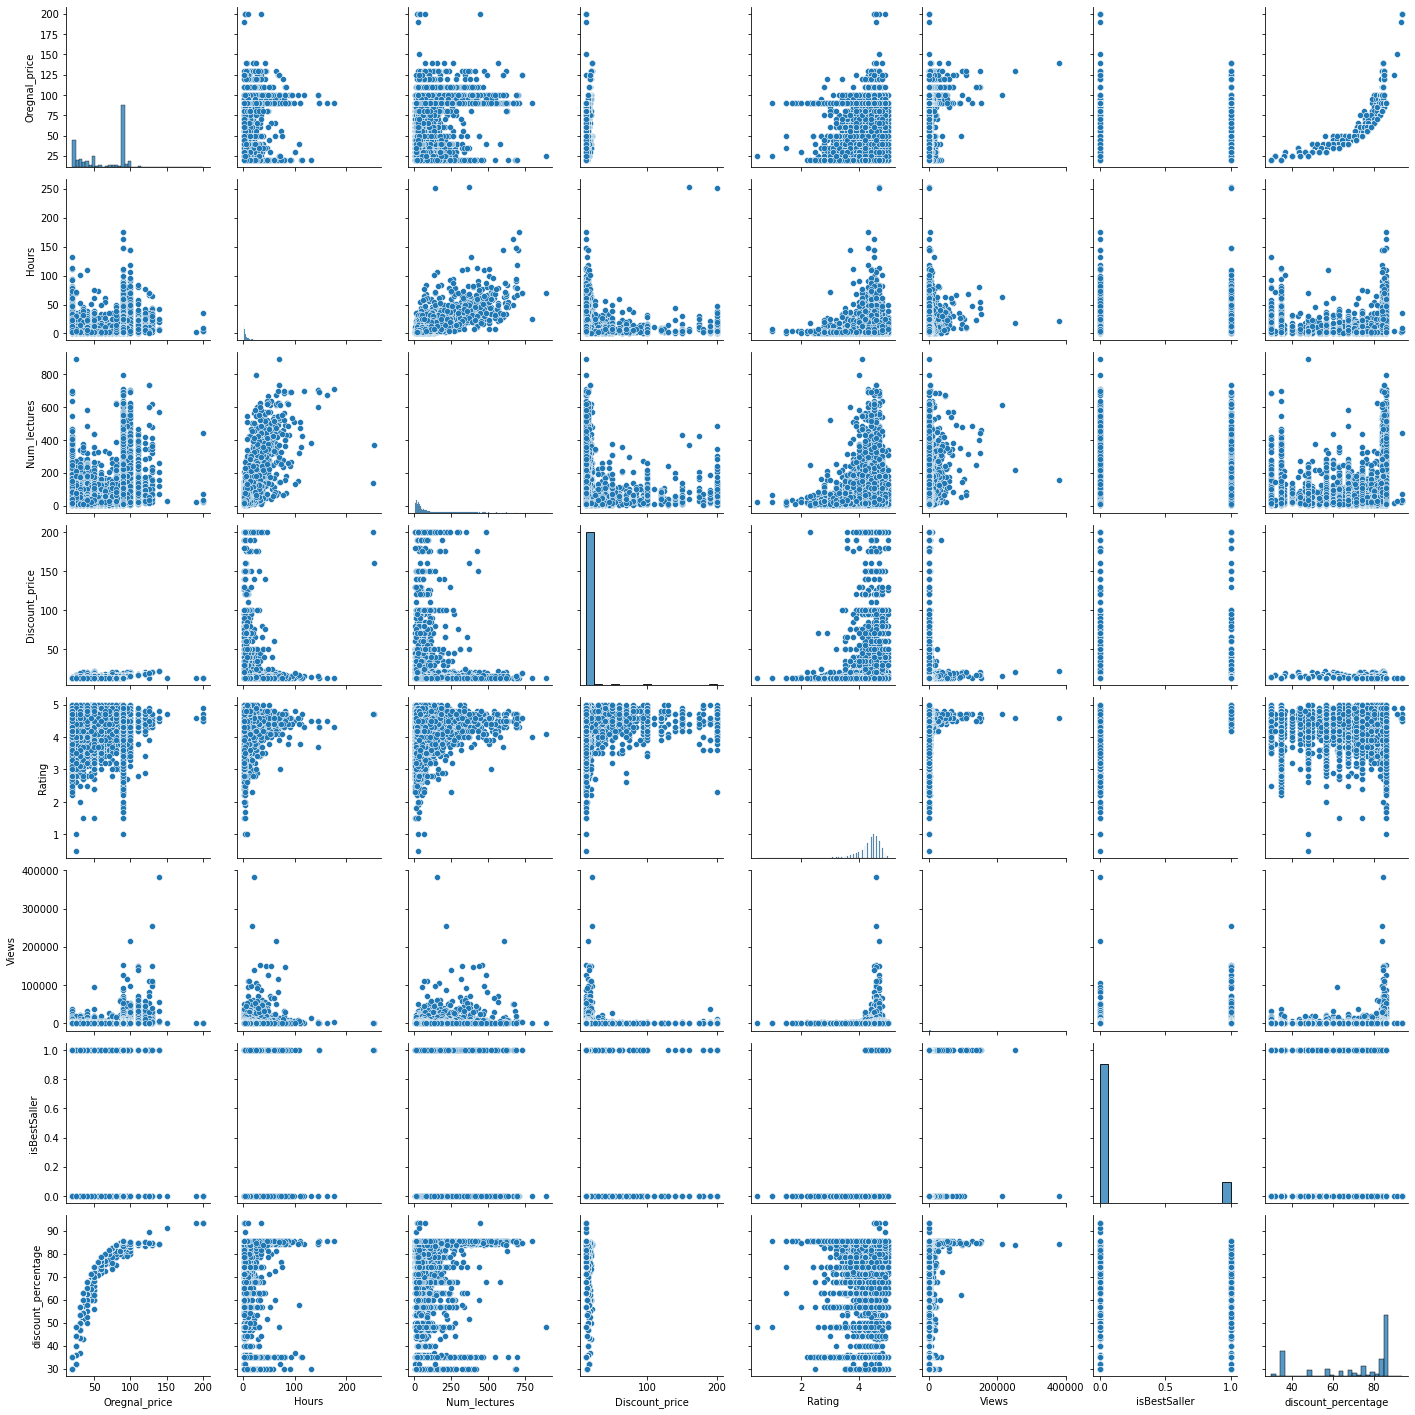

In [ ]:
print("Below is the pairplot for the udemy dataset")
sns.pairplot(df)

In [ ]:
fig = px.box(df, x=num_col[6], y="discount_percentage")
fig.show()

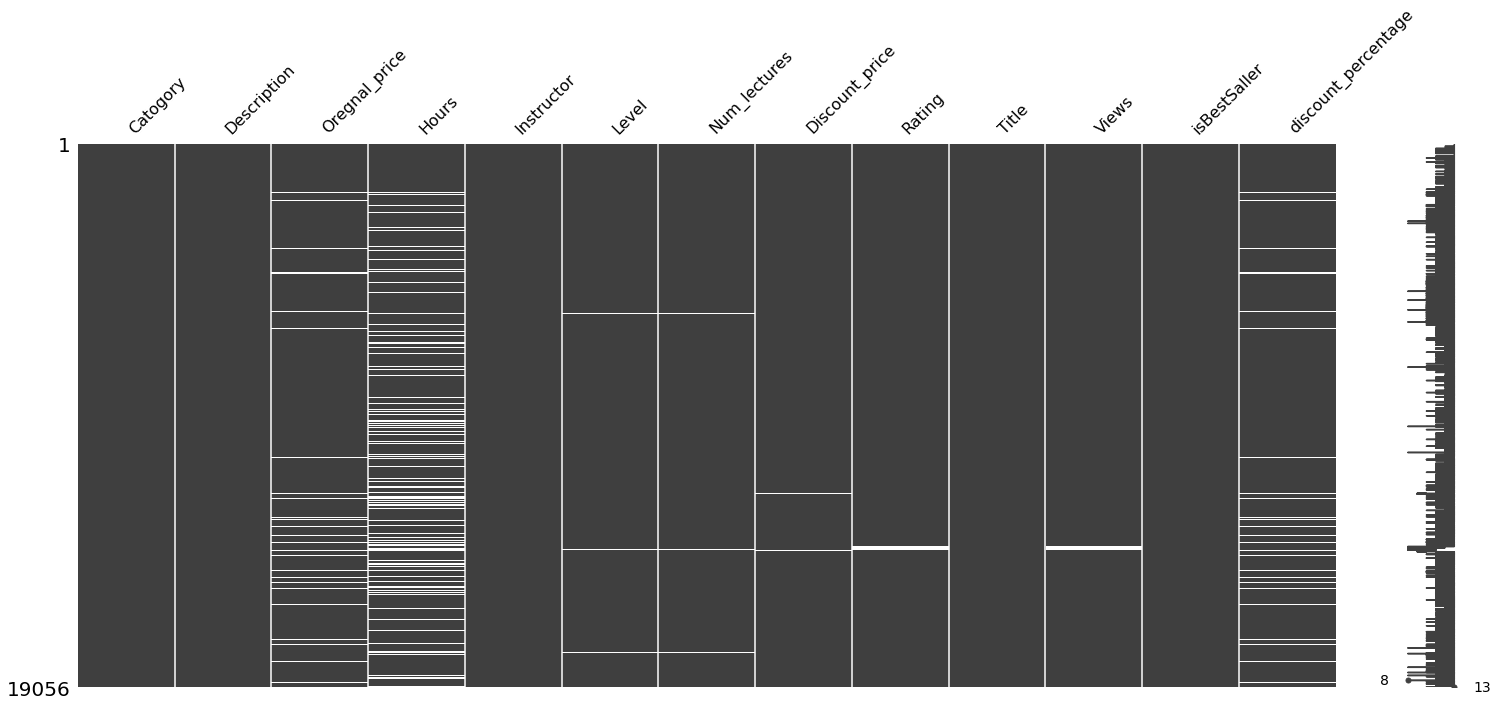

In [ ]:
msno.matrix(df)

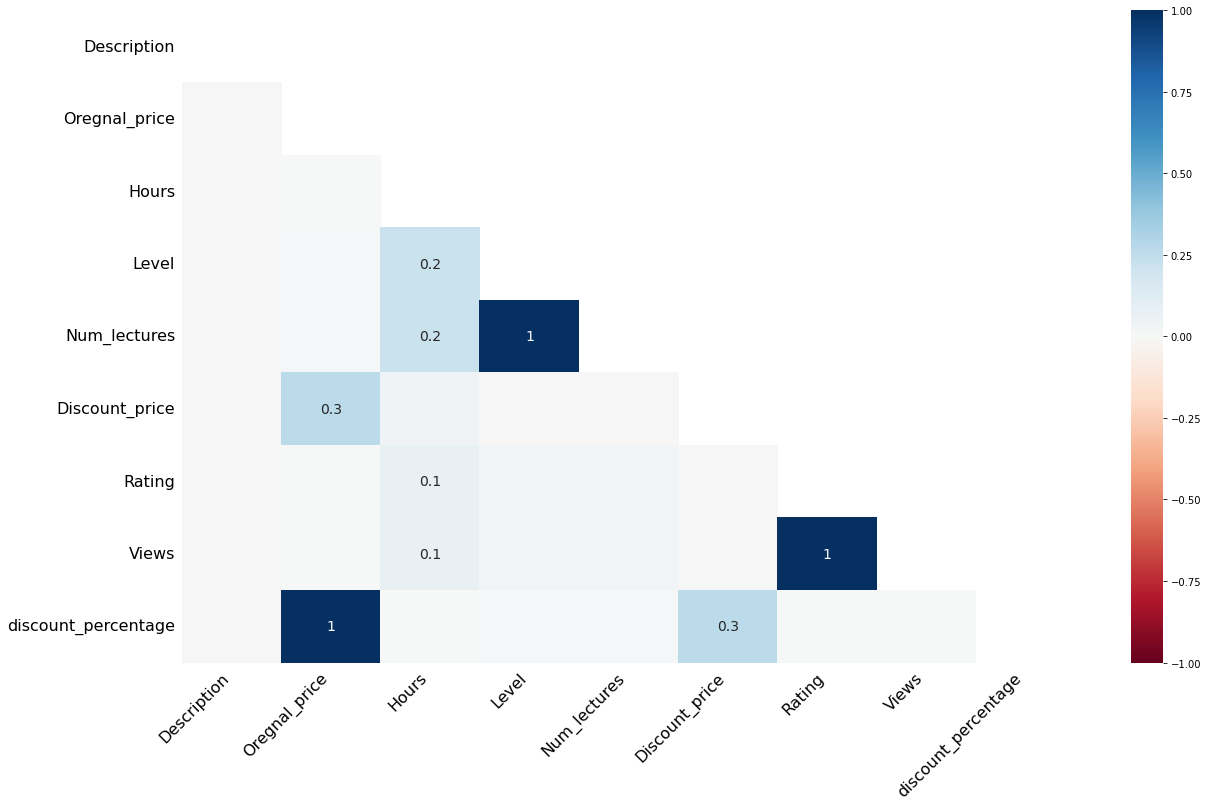

In [ ]:
msno.heatmap(df)

# Data Cleaning before


In [ ]:
df = df.dropna().reset_index()
print("Nan values was dropped and the dataset indexes was resetted")

Nan values was dropped and the dataset indexes was resetted


# MVP
- Basemodel 
- Cross Valedation + KFold = average of the scores came from CV
- plot for y and y_predict for train and val sets with Basemodel

## Beasline Model

In [ ]:
# split the data to val and test
train, test = train_test_split(df, test_size = 0.2)
train, val = train_test_split(train , test_size = 0.25)

In [ ]:
# LR baseline model
baseline_model = LinearRegression()
baseline_model.fit(train[num_col], train["discount_percentage"])


print("training score :", round(baseline_model.score(train[num_col], train["discount_percentage"]) ,5))
print("val score :", round(baseline_model.score(val[num_col], val["discount_percentage"]),5))

training score : 0.88116
val score : 0.87821


## Cross Valedation + KFold

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state = 1000)

print("all R^2: ", cross_val_score(baseline_model,train[num_col], train["discount_percentage"], cv=kf, scoring='r2'))
print("the avrage R^2: ",np.mean(cross_val_score(baseline_model,train[num_col], train["discount_percentage"], cv=kf, scoring='r2')))

all R^2:  [0.8814333  0.87348743 0.88253819 0.87852599 0.88745598]
the avrage R^2:  0.880688177891504


## Baseline Preformence Plots

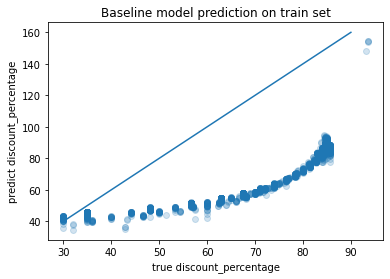

In [ ]:
plt.scatter(train["discount_percentage"], baseline_model.predict(train[num_col]), alpha=0.2)
plt.xlabel("true discount_percentage")
plt.ylabel("predict discount_percentage")
plt.title("Baseline model prediction on train set")
plt.plot([30, 90], [40, 160])

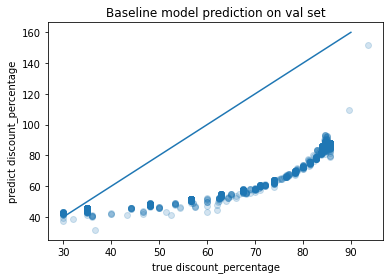

In [ ]:
plt.scatter(val["discount_percentage"], baseline_model.predict(val[num_col]), alpha=0.2)
plt.xlabel("true discount_percentage")
plt.ylabel("predict discount_percentage")
plt.title("Baseline model prediction on val set")
plt.plot([30, 90], [40, 160])

# Feature preparation


In [ ]:
df_dummy.columns

Index(['Level_All Levels', 'Level_Beginner', 'Level_Expert',
       'Level_Intermediate', 'Catogory_business', 'Catogory_design',
       'Catogory_development', 'Catogory_finance-and-accounting',
       'Catogory_health-and-fitness', 'Catogory_it-and-software',
       'Catogory_lifestyle', 'Catogory_marketing', 'Catogory_music',
       'Catogory_office-productivity', 'Catogory_photography-and-video',
       'Catogory_teaching-and-academics'],
      dtype='object')

In [ ]:
df_dummy = pd.get_dummies(df[['Level','Catogory']])
#df_dummy[car_cols] = df[car_cols]
df_dummy = df_dummy.drop( ["Level_Current price$12.99Original Price$89.99"],axis = 1)
df[df_dummy.columns] = df_dummy 
df

,index,Catogory,Description,Oregnal_price,Hours,Instructor,Level,Num_lectures,Discount_price,Rating,Title,Views,isBestSaller,discount_percentage,Level_All Levels,Level_Beginner,Level_Expert,Level_Intermediate,Catogory_business,Catogory_design,Catogory_development,Catogory_finance-and-accounting,Catogory_health-and-fitness,Catogory_it-and-software,Catogory_lifestyle,Catogory_marketing,Catogory_music,Catogory_office-productivity,Catogory_photography-and-video,Catogory_teaching-and-academics
0,0,development,Learn Python like a Professional Start from t...,139.99,22.0,Jose Portilla,All Levels,155.0,21.99,4.6,2021 Complete Python Bootcamp From Zero to Her...,381969.0,0,84.291735,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,development,COMPLETELY REDONE - The only course you need t...,99.99,63.5,Colt Steele,All Levels,610.0,15.99,4.7,The Web Developer Bootcamp 2021,214468.0,0,84.008401,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2,development,"Master Angular 12 (formerly ""Angular 2"") and b...",89.99,34.0,Maximilian Schwarzmüller,All Levels,461.0,12.99,4.6,Angular - The Complete Guide (2021 Edition),151943.0,1,85.565063,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,3,development,Learn to create Machine Learning Algorithms in...,129.99,44.5,"Kirill Eremenko, Hadelin de Ponteves, SuperDat...",All Levels,320.0,19.99,4.5,Machine Learning A-Z™: Hands-On Python & R In ...,150538.0,1,84.621894,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,4,development,Become a full-stack web developer with just on...,109.99,55.0,Dr. Angela Yu,All Levels,440.0,16.99,4.7,The Complete 2021 Web Development Bootcamp,149054.0,1,84.553141,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15088,19046,teaching-and-academics,"Topics: Descriptives, Correlation and Simple R...",89.99,2.5,Antonie van Voorden,Beginner,30.0,12.99,3.9,Statistics explained easy 1 - Descriptives,77.0,0,85.565063,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
15089,19048,teaching-and-academics,"An In-Depth Look at Word & Sentence Stress, Co...",59.99,3.0,Nicole Kaup,Expert,23.0,12.99,4.5,The Rhythm & Melody of American English - Part 1,77.0,0,78.346391,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
15090,19049,teaching-and-academics,Distinguish Yourself in the Field of Education...,89.99,8.0,Frank Avella,Beginner,71.0,12.99,4.3,Google Certified Educator Level 1 Bootcamp,77.0,0,85.565063,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
15091,19051,teaching-and-academics,Learn more about Psychodynamic Theories in Psy...,89.99,3.0,Glory Dimitrova,All Levels,19.0,12.99,4.3,Psychodynamic Psychology - Certification Course,77.0,0,85.565063,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df = df.drop(['Level','Catogory','index','Description','Instructor','Title'],axis =1)
df.head(2)

,Oregnal_price,Hours,Num_lectures,Discount_price,Rating,Views,isBestSaller,discount_percentage,Level_All Levels,Level_Beginner,Level_Expert,Level_Intermediate,Catogory_business,Catogory_design,Catogory_development,Catogory_finance-and-accounting,Catogory_health-and-fitness,Catogory_it-and-software,Catogory_lifestyle,Catogory_marketing,Catogory_music,Catogory_office-productivity,Catogory_photography-and-video,Catogory_teaching-and-academics
0,139.99,22.0,155.0,21.99,4.6,381969.0,0,84.291735,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,99.99,63.5,610.0,15.99,4.7,214468.0,0,84.008401,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


# Data Splitting

In [ ]:
train, test = train_test_split(df, test_size = 0.2)
train, val = train_test_split(train , test_size = 0.25)

# Feature ENG.

#### scaled features

In [ ]:
mms = MinMaxScaler()
mms1 = MinMaxScaler()
train['scaled_Num_lectures'] = mms.fit_transform(np.reshape([train['Num_lectures']],(9055,1)))
train['scaled_Views'] = mms1.fit_transform(np.reshape([train['Views']],(9055,1)))

val['scaled_Num_lectures'] = mms.transform(np.reshape([val['Num_lectures']],(3019,1)))
val['scaled_Views'] = mms1.transform(np.reshape([val['Views']],(3019,1)))

#### Poly Features

In [ ]:
#create poly features on numerical variables
pf = PolynomialFeatures(2) 
x_train_num_poly  = pf.fit_transform(train[['Hours','Views','Rating','Num_lectures','Discount_price']])
x_val_num_poly = pf.transform(val[['Hours','Views','Rating','Num_lectures','Discount_price']])


# Data Cleaning after


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning:

pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



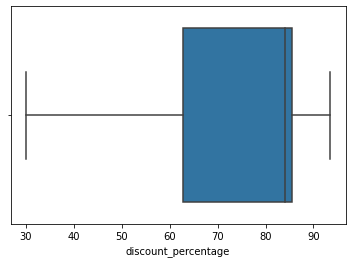

In [ ]:
# drop outlier
%pylab inline
%matplotlib inline
sns.boxplot(train['discount_percentage'])

# Feature Selection

In [ ]:
train.columns

Index(['Oregnal_price', 'Hours', 'Num_lectures', 'Discount_price', 'Rating',
       'Views', 'isBestSaller', 'discount_percentage', 'Level_All Levels',
       'Level_Beginner', 'Level_Expert', 'Level_Intermediate',
       'Catogory_business', 'Catogory_design', 'Catogory_development',
       'Catogory_finance-and-accounting', 'Catogory_health-and-fitness',
       'Catogory_it-and-software', 'Catogory_lifestyle', 'Catogory_marketing',
       'Catogory_music', 'Catogory_office-productivity',
       'Catogory_photography-and-video', 'Catogory_teaching-and-academics',
       'scaled_Num_lectures', 'scaled_Views'],
      dtype='object')

In [ ]:
# lasso
# array of all features names: https://towardsdatascience.com/feature-selection-in-machine-learning-using-lasso-regression-7809c7c2771a
features = ['Oregnal_price', 'Hours', 'Num_lectures', 'Discount_price', 'Rating',
       'Views', 'isBestSaller', 'Level_All Levels',
       'Level_Beginner', 'Level_Expert', 'Level_Intermediate',
       'Catogory_business', 'Catogory_design', 'Catogory_development',
       'Catogory_finance-and-accounting', 'Catogory_health-and-fitness',
       'Catogory_it-and-software', 'Catogory_lifestyle', 'Catogory_marketing',
       'Catogory_music', 'Catogory_office-productivity',
       'Catogory_photography-and-video', 'Catogory_teaching-and-academics',
       'scaled_Num_lectures', 'scaled_Views']


pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

search.fit(train.drop('discount_percentage',axis = 1),train['discount_percentage'])

# print(search.best_params_)

coefficients = search.best_estimator_.named_steps['model'].coef_

importance = np.abs(coefficients)

print('survived',np.array(features)[importance > 0])
print('discarded',np.array(features)[importance == 0])

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV] model__alpha=0.1 ................................................
[CV] .................. model__alpha=0.1, score=-41.547, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] .................. model__alpha=0.1, score=-44.081, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] .................. model__alpha=0.1, score=-39.569, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] .................. model__alpha=0.1, score=-41.786, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] .................. model__alpha=0.1, score=-40.997, total=   0.0s
[CV] model__alpha=0.2 ................................................
[CV] .................. model__alpha=0.2, score=-41.824, total=   0.0s
[CV] model__alpha=0.2 ................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................. model__alpha=0.2, score=-41.479, total=   0.0s
[CV] model__alpha=0.30000000000000004 ................................
[CV] .. model__alpha=0.30000000000000004, score=-42.078, total=   0.0s
[CV] model__alpha=0.30000000000000004 ................................
[CV] .. model__alpha=0.30000000000000004, score=-44.802, total=   0.0s
[CV] model__alpha=0.30000000000000004 ................................
[CV] .. model__alpha=0.30000000000000004, score=-40.001, total=   0.0s
[CV] model__alpha=0.30000000000000004 ................................
[CV] .. model__alpha=0.30000000000000004, score=-42.312, total=   0.0s
[CV] model__alpha=0.30000000000000004 ................................
[CV] .. model__alpha=0.30000000000000004, score=-41.970, total=   0.0s
[CV] model__alpha=0.4 ................................................
[CV] .................. model__alpha=0.4, score=-42.389, total=   0.0s
[CV] model__alpha=0.4 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done 495 out of 495 | elapsed:   15.2s finished


In [ ]:
important_feature = ['Oregnal_price' , 'Hours', 'Num_lectures' , 'Discount_price' , 'Rating' ,'Views' ,
 'Level_Expert' , 'Level_Intermediate' , 'Catogory_design' ,
 'Catogory_finance-and-accounting' , 'Catogory_health-and-fitness' ,
 'Catogory_lifestyle' , 'Catogory_marketing' ,'Catogory_music' ,
 'Catogory_office-productivity' , 'Catogory_teaching-and-academics' ,
 'scaled_Num_lectures']

In [ ]:
val[important_feature].drop('scaled_Num_lectures', axis=1)

,Oregnal_price,Hours,Num_lectures,Discount_price,Rating,Views,Level_Expert,Level_Intermediate,Catogory_design,Catogory_finance-and-accounting,Catogory_health-and-fitness,Catogory_lifestyle,Catogory_marketing,Catogory_music,Catogory_office-productivity,Catogory_teaching-and-academics
7772,39.99,2.0,38.0,12.99,4.7,144.0,0,0,1,0,0,0,0,0,0,0
10208,89.99,9.0,73.0,12.99,4.2,59.0,0,0,0,0,0,1,0,0,0,0
15017,19.99,2.0,26.0,12.99,4.6,83.0,0,0,0,0,0,0,0,0,0,1
6149,89.99,5.5,85.0,12.99,3.8,95.0,0,0,0,0,0,0,0,0,1,0
964,89.99,4.0,35.0,12.99,4.6,1135.0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,124.99,30.0,174.0,18.99,4.4,979.0,0,0,0,0,0,0,0,0,0,0
1501,79.99,19.0,118.0,12.99,4.6,603.0,0,1,0,0,0,0,0,0,0,0
6045,79.99,1.5,23.0,12.99,3.9,127.0,0,0,0,0,0,0,0,0,1,0
7565,89.99,4.0,45.0,12.99,4.7,201.0,0,0,1,0,0,0,0,0,0,0


# Modeling

## train set

### target

In [ ]:
train_target = linear_reg(train[important_feature].drop('scaled_Num_lectures', axis=1),
                            train["discount_percentage"],
                            val[important_feature].drop('scaled_Num_lectures', axis=1),
                            val["discount_percentage"])

training score : 0.88307
val score : 0.87831


### log(target)

In [ ]:
train_log_target = linear_reg(train[important_feature].drop('scaled_Num_lectures', axis=1),
                            np.log(train["discount_percentage"]),
                            val[important_feature].drop('scaled_Num_lectures', axis=1),
                            np.log(val["discount_percentage"]))

training score : 0.81354
val score : 0.8057


 ## train set with Scaled Feature


### target

In [ ]:
train_target_scale = linear_reg(train[important_feature],
                            train["discount_percentage"],
                            val[important_feature],
                            val["discount_percentage"])

training score : 0.88307
val score : 0.87831


### log(target)

In [ ]:
train_log_target_scale = linear_reg(train[important_feature],
                            np.log(train["discount_percentage"]),
                            val[important_feature],
                            np.log(val["discount_percentage"]))

training score : 0.81354
val score : 0.8057


## train set with Ploy Features 

In [ ]:
# add the train to the poly features
x_train_poly_train = (np.concatenate(
                        [x_train_num_poly,
                         train[important_feature].drop('scaled_Num_lectures', axis=1).to_numpy()], 
                        axis=1))

x_val_poly_train = (np.concatenate(
                        [x_val_num_poly,
                         val[important_feature].drop('scaled_Num_lectures', axis=1).to_numpy()], 
                        axis=1))

### target

In [ ]:
train_target_Poly = linear_reg(x_train_poly_train,
                            train["discount_percentage"],
                            x_val_poly_train,
                            val["discount_percentage"]
                  )

training score : 0.88384
val score : 0.8784


### log(target)

In [ ]:
train_log_target_Poly = linear_reg(x_train_poly_train,
                            np.log(train["discount_percentage"]),
                            x_val_poly_train,
                            np.log(val["discount_percentage"])
                  )

training score : 0.81444
val score : 0.80565


 ## train set with Scaled & Ploy Features


In [ ]:
# add the train and scale to the poly features
x_train_poly_scale_train = (np.concatenate(
                        [x_train_num_poly,
                         train[important_feature].to_numpy()], 
                        axis=1))

x_val_poly_scale_train = (np.concatenate(
                        [x_val_num_poly,
                         val[important_feature].to_numpy()], 
                        axis=1))

### target

In [ ]:
train_target_Poly_scale = linear_reg(x_train_poly_scale_train,
                            train["discount_percentage"],
                            x_val_poly_scale_train,
                            val["discount_percentage"]
                  )

training score : 0.88384
val score : 0.8784


### log(target)

In [ ]:
train_log_target_Poly_scale = linear_reg(x_train_poly_scale_train,
                            np.log(train["discount_percentage"]),
                            x_val_poly_scale_train,
                            np.log(val["discount_percentage"])
                  )

training score : 0.81444
val score : 0.80565


# Models Evaluation 

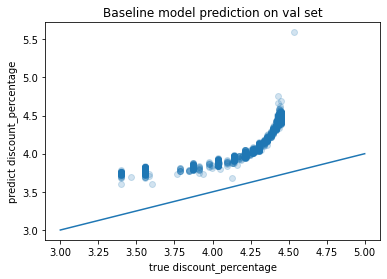

In [ ]:
plt.scatter(np.log(val["discount_percentage"]), train_log_target_Poly_scale.predict(x_val_poly_scale_train), alpha=0.2)
plt.xlabel("true discount_percentage")
plt.ylabel("predict discount_percentage")
plt.title("Baseline model prediction on val set")
plt.plot([3,5], [3,4])